In [45]:
import numpy as np
import matplotlib.pyplot as plt
from utils import gen_bayes
from scipy.linalg import norm
from time import time

# Bayesian learning

In the previous example, we investigated learning from time series using Markov tools.
Here, we instead devote our attention to Bayesian learning.

## Problem formulation

Let us consider two processes ($X$ and $Y$), which are allowed to assume values from different supports, respectively $\mathcal{X}$ and $\mathcal{Y}$. Imagine having a collection of $T$ observations $\{ \pi^X, \pi^Y\}_t$, for $t=1,\dots,T$.

In contrast to the previous lecture, we do not necessarily assume temporal ordering in the samples.

We would like to find a matrix $\Lambda \in \mathbb{P}^{M \times K}$, where $M$ is the size of $\mathcal{Y}$ and $K$ is that of $\mathcal{X}$, such that we minimize the distance between $\pi^Y_t$ and $\Lambda\pi^X_t$ for each $t$.

So we have $K$ Zustände of $X$ and $M$ Zustände of Y.

Note: $\mathbb{P}$ is the set of all possible left stochastic matrices.

We can generate some data of this type with the provided function `gen_bayes`

[4 6 4 6 3 2 9 0 2 3 2 4 7 1 6 8 9 6 3 9 6 0 7 6 6 6 9 1 3 7 8 0 7 4 9 2 9
 3 6 1 4 6 4 9 4 6 8 3 8 1 3 1 2 7 0 9 0 2 0 4 9 8 3 6 9 7 8 9 4 2 7 0 3 9
 2 7 8 4 6 8 0 2 2 7 8 3 7 5 5 7 6 1 4 4 4 9 3 9 5 4]


Text(0.5, 1.0, '$\\Lambda_{\\text{true}}$')

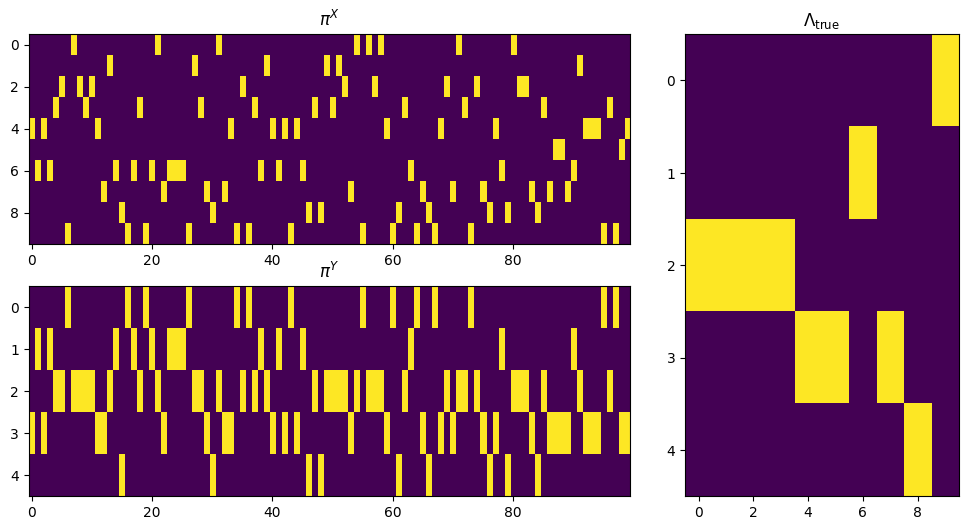

In [46]:
K,M,T = 10, 5, 100
pi_X, pi_Y, Lambda_true = gen_bayes(K,M,T)
print(np.argmax(pi_X, axis = 0))
l = '''
AAC
BBC
'''
fig, axs = plt.subplot_mosaic(l, figsize=(12,6))

axs["A"].imshow(pi_X, aspect="auto", interpolation="none")
axs["A"].set_title(r"$\pi^X$")
axs["B"].imshow(pi_Y, aspect="auto", interpolation="none")
axs["B"].set_title(r"$\pi^Y$")
axs["C"].imshow(Lambda_true, aspect="auto", interpolation="none")
axs["C"].set_title(r"$\Lambda_{\text{true}}$")

The $\Lambda$ matrix can be estimated in the same way as in the Markov case, with the exception that it will not be a square matrix. Implement a function to do so below:

In [47]:
def compute_Lambda(X, Y):
    K = X.shape[0]
    M = Y.shape[0]
    P = np.zeros((M, K))  
    X = np.argmax(X, axis = 0)
    Y = np.argmax(Y, axis = 0)
    for t in range(0, len(X) - 1):
        i = X[t]
        j = Y[t]
        P[j,i] += 1  # ZUstand i wechselt in Zustand j
    
    spaltensummen = P.sum(axis=0, keepdims=True)
    spaltensummen[spaltensummen == 0] = 1
    P = P / spaltensummen
    return P

Text(0.5, 1.0, 'estimated lambda')

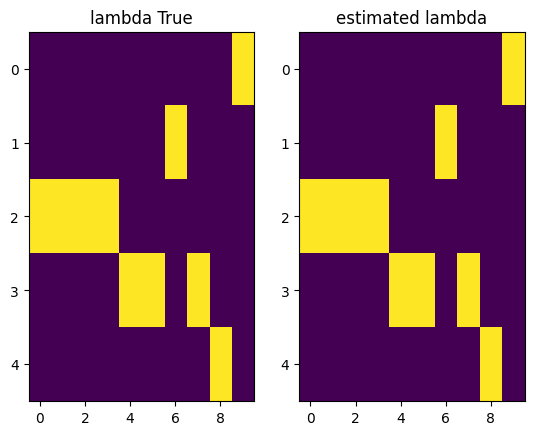

In [48]:
Lambda = compute_Lambda(pi_X, pi_Y)

fig_l, axs_l = plt.subplots(1,2)

axs_l[0].imshow(Lambda_true, aspect="auto", interpolation='none')
axs_l[0].set_title("lambda True")
axs_l[1].imshow(Lambda, aspect="auto", interpolation='none')
axs_l[1].set_title("estimated lambda")

In the example above, we used a deterministic matrix $\Lambda$, but this approach works also with less deterministic ones.

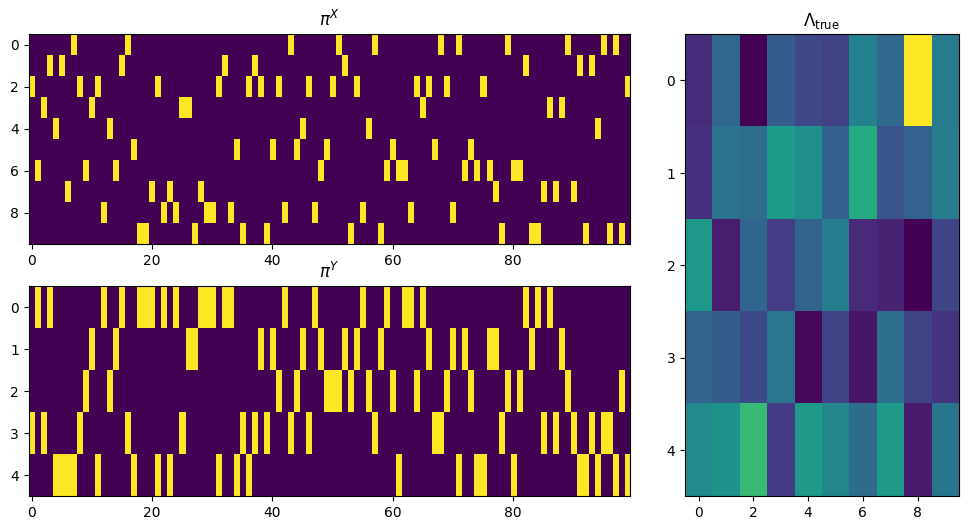

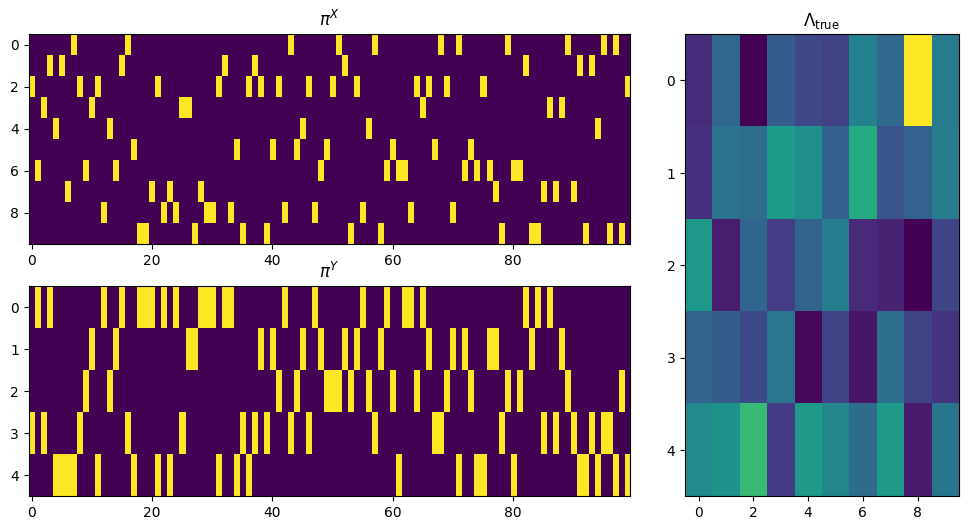

In [49]:
pi_X2, pi_Y2, Lambda_true2 = gen_bayes(K,M,T,deterministic=False)

fig2, axs2 = plt.subplot_mosaic(l, figsize=(12,6))

axs2["A"].imshow(pi_X2, aspect="auto", interpolation="none")
axs2["A"].set_title(r"$\pi^X$")
axs2["B"].imshow(pi_Y2, aspect="auto", interpolation="none")
axs2["B"].set_title(r"$\pi^Y$")
axs2["C"].imshow(Lambda_true2, aspect="auto", interpolation="none")
axs2["C"].set_title(r"$\Lambda_{\text{true}}$")

fig2

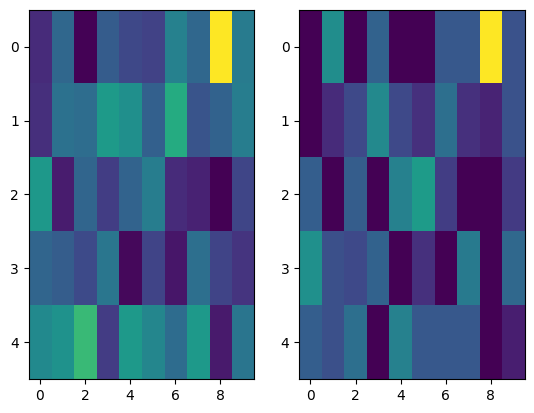

In [50]:
Lambda2 = compute_Lambda(pi_X2, pi_Y2)

fig_l2, axs_l2 = plt.subplots(1,2)

axs_l2[0].imshow(Lambda_true2, aspect="auto", interpolation='none')
axs_l2[1].imshow(Lambda2, aspect="auto", interpolation='none')

Notice, in this case, that increasing size of observation can lead to better results

In [51]:
Ts = np.floor(np.logspace(1, 5, 20)).astype(np.int64)
n_reps = 20

errs = np.zeros((len(Ts), n_reps)).T
tims = np.zeros_like(errs)


for rep in range(n_reps):
    for t_idx, T in enumerate(Ts):
        pi_X, pi_Y, Lambda_true = gen_bayes(K,M, T=T)
        est_P = compute_Lambda(pi_X, pi_Y)
        error = np.linalg.norm(est_P - Lambda_true)
        errs[rep, t_idx] = error
# As in the previous exercise, investigate the scaling of the quality with data length

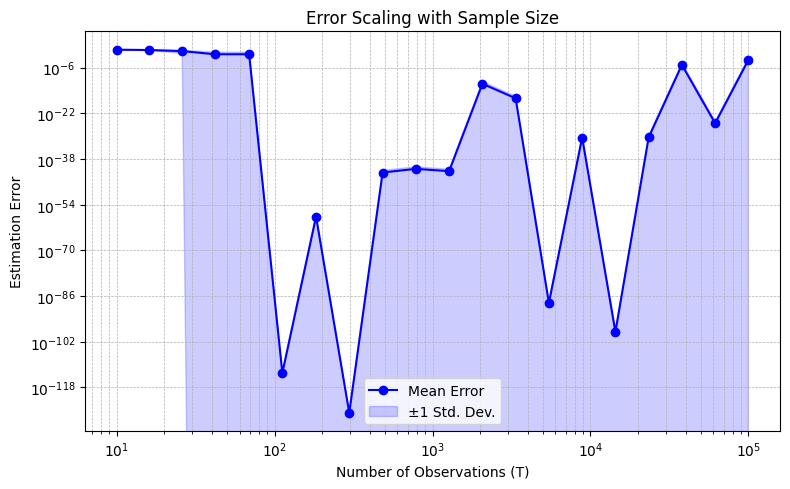

In [52]:
# plot errors and time
mean_errs = np.mean(errs, axis=0)
std_errs = np.std(errs, axis=0)

plt.figure(figsize=(8, 5))
plt.plot(Ts, mean_errs, label='Mean Error', color='blue', marker='o')
plt.fill_between(Ts, mean_errs - std_errs, mean_errs + std_errs,
                 color='blue', alpha=0.2, label='±1 Std. Dev.')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Observations (T)')
plt.ylabel('Estimation Error')
plt.title('Error Scaling with Sample Size')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()